### Hector Daniel Juarez Leonel
# PCA - Principal Component Analysis

Esta es una técnica para reducir la dimensión de un conjunto de datos. La dimensión está dada por el número de caracteristicas de los objetos.
Entre sus aplicaciónes, se encuentran:
<ul>
    <li>Preprocesamiento de un sistema de aprendizaje automático</li>
    <li>Reducción de ruido</li>
    <li>Generación plausible de datasets artificiales</li>
    <li>Análisis financiero / Análisis de riesgos</li>
</ul>

Para poder entender el funcionamiento de PCA, primero se deben de entender los siguientes conceptos:

## Promedio
El promedio, media o valor esperado, es simplemente la suma de todos los valores de un conjunto de datos dividido entre el número total de datos
## Desviación estandar
Frecuentemente esta es referrida como la dispersión de los datos y es relacionada con la varianza. La desviación estandar es una medida de que tanto los datos se acercan a la media, en una distribución normal, aproximadamente el 68% de los datos estan entre una desviación estandar y la media.
La relación entre la desviación estandar y la varianza es bastante simple, la varianza es la desviación estandar al cuadrado.
## Covarianza
Mientras la desviación estandar o la varianza es la dispersión de los datos calculados den una sola dimensión, la covarianza es la varianza de una dimensión (o caracteristica) en contra de otra. Cuando la covarianza de una dimensión es calculada consigo misma, el resultado es el mismo que calcular la varianza para esa dimensión.
## Matriz de covarianza.
Una matriz de covarianza es una representación de los posibles valores de covarianza que pueden ser calculados para un dataset.

$$cov=\left[\begin{matrix}cov(X,X)&cov(X,Y)&cov(X,Z)\\cov(Y,X)&cov(Y,Y)&cov(Y,Z)\\cov(Z,X)&cov(Z,Y)&cov(Z,Z)\\\end{matrix}\right]$$

## Eigenvalores y Eigenvectores
El concepto matemático de eigenvalores y eigenvectores es muy importante en el campo de la física e ingenieria, y estos tambien forman parte de los pasos finales al calcular los componentes principales del dataset. La ecuación de algebra linear para descomponer un dataset (a) en sus equivalentes eigenvalores (S) y eigenvectores (U) es de la siguiente manera:

$$a=USV^T$$

poniendo estas variables ene l contexto de PCA:
<ul>
    <li>Eigenvectores (U) son los componentes que contribuyen con información al dataset. Cada eigenvector describe alguna cantidad de variabilidad dentro del dataset</li>
    <li>Eigenvalores (S) son los valores individuales que describen que tanto contribuye cada eigenvector al dataset. El eigenvector con el eigenvalor más pequeño contribuye la menor cantidad de varianza o información a los datos</li>

</ul>

A continuación se muestra una implementación a mano de PCA haciendo uso de librerias como numpy para el manejo de datos y de matplotlib para comparar que el resultado con la implementación ya dada por la libreria sklearn.

In [1]:
#Carga de librerias para el procesamiento y graficación de los datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
#Utiliza pandas para leer un archivo csv. El archivo original tiene más de 2 atributos
# y es por esto que solo selecciona 2, para eliminar los demás, esto es solo por simplicidad
# con los datos y hacer el ejemplo sencillo de entender.
df = pd.read_csv('../data/iris-data.csv')
df = df[['Sepal Length', 'Sepal Width']]
df

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [4]:
#Aplica PCA utilizando la libreria de sklearn, definiendo el número de componentes resultantes en 1
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

In [5]:
#A continuación viene la forma manual de aplicar PCA,
# Primero obtiene la covarianza de los datos  utilizando la libreria de numpy
cov = np.cov(df.values.T)
cov

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [8]:
#Aqui obtiene los eivenvectores y eigenvalores utilizando numpy con el resultado de covarianza
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
eigenvectors

array([[-0.99693955,  0.07817635],
       [ 0.07817635,  0.99693955]])

In [5]:
#ya que se desea reducir a una dimensión los datos, solo utiliza el primer eigenvector
#y realiza un producto punto entre este y el dataset, obteniendo el pca de manera manual.
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

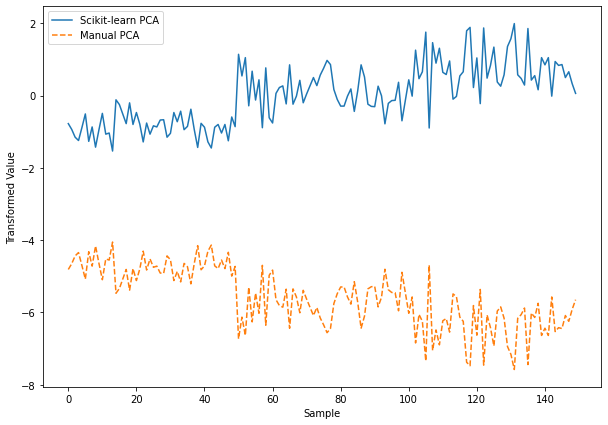

In [6]:
#A continuación, grafica ambos resultados, como se puede observar, no da el mismo resultado
# el pca manual y el implementado por sklearn, pero simplemente hay que aplicar algunas operaciones
#para que se vean de la misma forma, las cuales se muestran en las siguientes celdas
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [7]:
# Aqui imprime el resultado de los componentes del modelo de PCA
model.components_

array([[ 0.99693955, -0.07817635]])

In [8]:
#Ahora, muestra el valor del eigenvector utilizado, que es en realidad el mismo
#valor que el componente dado por sklearn pero con signo negativo
P

array([-0.99693955,  0.07817635])

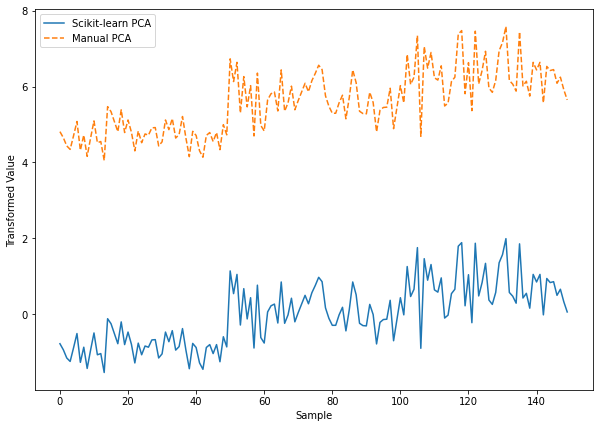

In [9]:
#Por tanto, multiplica el valor del pca manual por -1, sin embargo, aun no
#es el mismo resultado que el dado por sklearn, se observa un desplazamiento
#vertical lo cual significa que hay una constante por sumar
manual_pca *= -1
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [10]:
#Aqui vuelve a calcular el PCA pero en vez de hacer el producto punto
#del eigenvector con el dataset, primero calcula el promedio del dataset
#para cada columna (mean_vals) y le resta este valor a los datos (offset_vals)
#y ahora realiza el producto punto con este offset
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

In [11]:
#como obtuvo denuevo los datos y recordando que pca utiliza el eigenvector con signo
#contrario, multiplica el resultado de pca denuevo por -1
manual_pca *= -1

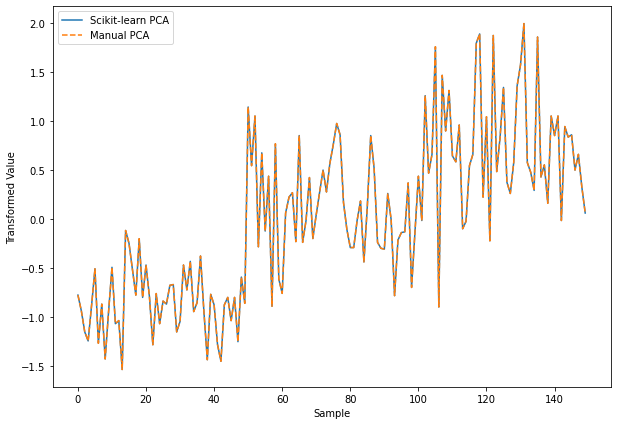

In [12]:
#Finalmente grafica el resultado, verificando que coincide el resultado manual con
#la implementación de sklearn
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

# Conclusión

PCA es una manera de reducir la dimensión de un conjunto de datos, creo que una de sus principales ventajas es reducir la complejidad de un problema y reducir ruido en el conjunto de datos.

Algo que me pareció muy interesante es un ejemplo del libro donde al aplicar PCA sin cambiar la dimensión, es posible crear una matriz de transformación que es invertible, es decir, puede convertir los datos de A -> B y de B -> A, lo cual da pie a los autoencoders que es el tema siguiente.

El inconveniente es que al eliminar datos se pierde información que si podria ser de utilidad, y una vez hecha la reducción de dimension no es posible regresar a la dimensión original.
